In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Paths

In [23]:
dataset = 'data/static_gestures/static_gestures.csv'
model_save_path = 'model/static_gestures/static_gestures_model.h5'
tflite_save_path = 'model/static_gestures/static_gestures_model.tflite'

# Number of classes

In [5]:
NUM_CLASSES = 6

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
48/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1673 - loss: 1.8751
Epoch 1: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1745 - loss: 1.8137 - val_accuracy: 0.2667 - val_loss: 1.6965
Epoch 2/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2346 - loss: 1.7153
Epoch 2: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2599 - loss: 1.6904 - val_accuracy: 0.5466 - val_loss: 1.5460
Epoch 3/1000
32/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3436 - loss: 1.6159 
Epoch 3: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3739 - loss: 1.5731 - val_accuracy: 0.6231 - val_loss: 1.3705
Epoch 4/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4400 - loss: 1.4691
Epoch 4: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4370 - loss: 1.4476 - val_accuracy: 0.6342 - val_loss: 1.2219
Epoch 5/1000
52/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4790 - loss: 1.3614
Epoch 5: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4822 - loss: 1.3424 - val_accuracy: 0.6282 - val_loss: 1.1058
Epoch 6/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5120 - loss: 1.2796
Epoch 6: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5177 - loss: 1.2565 - val_accuracy: 0.6640 - val_loss: 1.0091
Epoch 7/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5308 - loss: 1.2203 
Epoch 7: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5355 - loss: 1.2034 - val_accuracy: 0.7035 - val_loss: 0.9488
Epoch 8/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5439 - loss: 1.1641 
Epoch 8: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5447 - loss: 1.1661 - val_accuracy: 0.7154 - val_loss: 0.8882
Epoch 9/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5753 - loss: 1.1135 
Epoch 9: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - loss: 1.1020 - val_accuracy: 0.7342 - val_loss: 0.8255
Epoch 10/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5808 - loss: 1.0848 
Epoch 10: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5907 - loss: 1.0745 - val_accuracy: 0.7571 - val_loss: 0.7722
Epoch 11/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5835 - loss: 1.0664 
Epoch 11: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5874 - loss: 1.0565 - val_accuracy: 0.7690 - val_loss: 0.7367
Epoch 12/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6208 - loss: 1.0367 
Epoch 12: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6166 - loss: 1.0259 - val_accuracy: 0.7661 - val_loss: 0.7048
Epoch 13/1000
41/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6013 - loss: 1.0345 
Epoch 13: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 1.0112 - val_accuracy: 0.7771 - val_loss: 0.6752
Epoch 14/1000
41/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6205 - loss: 0.9932 
Epoch 14: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6190 - loss: 0.9911 - val_accuracy: 0.7907 - val_loss: 0.6499
Epoch 15/1000
43/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6190 - loss: 0.9869 
Epoch 15: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 0.9799 - val_accuracy: 0.7924 - val_loss: 0.6305
Epoch 16/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6416 - loss: 0.9554 
Epoch 16: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.9535 - val_accuracy: 0.7924 - val_loss: 0.6131
Epoch 17/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6400 - loss: 0.9374 
Epoch 17: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.9484 - val_accuracy: 0.8111 - val_loss: 0.5916
Epoch 18/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6518 - loss: 0.9244 
Epoch 18: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.9264 - val_accuracy: 0.8001 - val_loss: 0.5851
Epoch 19/1000
46/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 0.9225 
Epoch 19: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6474 - loss: 0.9201 - val_accuracy: 0.8022 - val_loss: 0.5647
Epoch 20/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.9167
Epoch 20: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.9148 - val_accuracy: 0.8052 - val_loss: 0.5668
Epoch 21/1000
36/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6756 - loss: 0.8881 
Epoch 21: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 0.8865 - val_accuracy: 0.8201 - val_loss: 0.5378
Epoch 22/1000
37/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6525 - loss: 0.9122 
Epoch 22: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.8990 - val_accuracy: 0.8128 - val_loss: 0.5435
Epoch 23/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6726 - loss: 0.8849 
Epoch 23: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6721 - loss: 0.8762 - val_accuracy: 0.8260 - val_loss: 0.5253
Epoch 24/1000
37/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6725 - loss: 0.8761 
Epoch 24: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 0.8716 - val_accuracy: 0.8090 - val_loss: 0.5249
Epoch 25/1000
37/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6618 - loss: 0.8785 
Epoch 25: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - loss: 0.8724 - val_accuracy: 0.8260 - val_loss: 0.5100
Epoch 26/1000
29/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.8246 
Epoch 26: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.8473 - val_accuracy: 0.8333 - val_loss: 0.4965
Epoch 27/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7035 - loss: 0.8002 
Epoch 27: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6911 - loss: 0.8357 - val_accuracy: 0.8316 - val_loss: 0.4853
Epoch 28/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.8803 
Epoch 28: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.8536 - val_accuracy: 0.8379 - val_loss: 0.4882
Epoch 29/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.8667
Epoch 29: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6828 - loss: 0.8472 - val_accuracy: 0.8388 - val_loss: 0.4881
Epoch 30/1000
43/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6868 - loss: 0.8234 
Epoch 30: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.8244 - val_accuracy: 0.8375 - val_loss: 0.4732
Epoch 31/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6937 - loss: 0.8299 
Epoch 31: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.8272 - val_accuracy: 0.8209 - val_loss: 0.4859
Epoch 32/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.8181
Epoch 32: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 0.8243 - val_accuracy: 0.8396 - val_loss: 0.4655
Epoch 33/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6898 - loss: 0.8268 
Epoch 33: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.8138 - val_accuracy: 0.8418 - val_loss: 0.4565
Epoch 34/1000
41/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6890 - loss: 0.8214 
Epoch 34: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.8061 - val_accuracy: 0.8490 - val_loss: 0.4598
Epoch 35/1000
34/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - loss: 0.8309 
Epoch 35: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.8049 - val_accuracy: 0.8635 - val_loss: 0.4431
Epoch 36/1000
46/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.8151
Epoch 36: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 0.8077 - val_accuracy: 0.8766 - val_loss: 0.4351
Epoch 37/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7069 - loss: 0.8094 
Epoch 37: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7072 - loss: 0.8032 - val_accuracy: 0.8643 - val_loss: 0.4384
Epoch 38/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7185 - loss: 0.7842
Epoch 38: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7123 - loss: 0.7823 - val_accuracy: 0.8915 - val_loss: 0.4196
Epoch 39/1000
46/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7248 - loss: 0.7608
Epoch 39: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.7706 - val_accuracy: 0.8571 - val_loss: 0.4326
Epoch 40/1000
49/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.7800
Epoch 40: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.7835 - val_accuracy: 0.8728 - val_loss: 0.4132
Epoch 41/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7140 - loss: 0.7746
Epoch 41: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7184 - loss: 0.7706 - val_accuracy: 0.8720 - val_loss: 0.4127
Epoch 42/1000
45/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.7693
Epoch 42: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7234 - loss: 0.7650 - val_accuracy: 0.8771 - val_loss: 0.4077
Epoch 43/1000
31/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.7946 
Epoch 43: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.7867 - val_accuracy: 0.8775 - val_loss: 0.4134
Epoch 44/1000
30/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.7713 
Epoch 44: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.7642 - val_accuracy: 0.8762 - val_loss: 0.4026
Epoch 45/1000
27/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7328 - loss: 0.7266 
Epoch 45: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.7407 - val_accuracy: 0.8826 - val_loss: 0.3991
Epoch 46/1000
47/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.7513
Epoch 46: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7265 - loss: 0.7551 - val_accuracy: 0.8856 - val_loss: 0.3960
Epoch 47/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.7708
Epoch 47: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.7551 - val_accuracy: 0.8860 - val_loss: 0.3874
Epoch 48/1000
28/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7235 - loss: 0.7454 
Epoch 48: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.7455 - val_accuracy: 0.8937 - val_loss: 0.3808
Epoch 49/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.7568
Epoch 49: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7308 - loss: 0.7385 - val_accuracy: 0.9090 - val_loss: 0.3721
Epoch 50/1000
41/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.7527
Epoch 50: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7302 - loss: 0.7436 - val_accuracy: 0.8928 - val_loss: 0.3819
Epoch 51/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.7061
Epoch 51: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.7326 - val_accuracy: 0.8945 - val_loss: 0.3755
Epoch 52/1000
32/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7394 - loss: 0.7465 
Epoch 52: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.7327 - val_accuracy: 0.8869 - val_loss: 0.3768
Epoch 53/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.7436
Epoch 53: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7330 - loss: 0.7338 - val_accuracy: 0.8877 - val_loss: 0.3774
Epoch 54/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - loss: 0.7179
Epoch 54: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7384 - loss: 0.7201 - val_accuracy: 0.9000 - val_loss: 0.3575
Epoch 55/1000
48/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.7434
Epoch 55: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7351 - loss: 0.7223 - val_accuracy: 0.8945 - val_loss: 0.3708
Epoch 56/1000
28/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7454 - loss: 0.7058 
Epoch 56: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7456 - loss: 0.7228 - val_accuracy: 0.8843 - val_loss: 0.3741
Epoch 57/1000
33/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.7183
Epoch 57: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.7095 - val_accuracy: 0.9073 - val_loss: 0.3554
Epoch 58/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.7247
Epoch 58: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7446 - loss: 0.7197 - val_accuracy: 0.8869 - val_loss: 0.3735
Epoch 59/1000
36/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7465 - loss: 0.6989 
Epoch 59: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7496 - loss: 0.6995 - val_accuracy: 0.8962 - val_loss: 0.3564
Epoch 60/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7432 - loss: 0.7042
Epoch 60: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7405 - loss: 0.7054 - val_accuracy: 0.8903 - val_loss: 0.3651
Epoch 61/1000
24/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.7295 
Epoch 61: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7495 - loss: 0.6985 - val_accuracy: 0.9017 - val_loss: 0.3525
Epoch 62/1000
27/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.6830 
Epoch 62: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.6942 - val_accuracy: 0.9111 - val_loss: 0.3484
Epoch 63/1000
25/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.6792  
Epoch 63: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.6736 - val_accuracy: 0.8992 - val_loss: 0.3445
Epoch 64/1000
31/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.7107 
Epoch 64: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7509 - loss: 0.7053 - val_accuracy: 0.8962 - val_loss: 0.3535
Epoch 65/1000
33/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.6741 
Epoch 65: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.6785 - val_accuracy: 0.8966 - val_loss: 0.3509
Epoch 66/1000
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7426 - loss: 0.7116
Epoch 66: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.6904 - val_accuracy: 0.8822 - val_loss: 0.3602
Epoch 67/1000
37/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.6763
Epoch 67: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.6883 - val_accuracy: 0.8949 - val_loss: 0.3508
Epoch 68/1000
27/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.6643 
Epoch 68: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7593 - loss: 0.6659 - val_accuracy: 0.9090 - val_loss: 0.3362
Epoch 69/1000
23/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.6647 
Epoch 69: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7510 - loss: 0.6784 - val_accuracy: 0.9051 - val_loss: 0.3453
Epoch 70/1000
40/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.6993
Epoch 70: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7536 - loss: 0.6826 - val_accuracy: 0.9000 - val_loss: 0.3438
Epoch 71/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.6701
Epoch 71: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7529 - loss: 0.6847 - val_accuracy: 0.9056 - val_loss: 0.3397
Epoch 72/1000
50/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.6844
Epoch 72: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7590 - loss: 0.6716 - val_accuracy: 0.8924 - val_loss: 0.3438
Epoch 73/1000
32/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.6949
Epoch 73: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7463 - loss: 0.6986 - val_accuracy: 0.9013 - val_loss: 0.3439
Epoch 74/1000
28/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7616 - loss: 0.6681
Epoch 74: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7537 - loss: 0.6825 - val_accuracy: 0.9103 - val_loss: 0.3324
Epoch 75/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.6921
Epoch 75: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7543 - loss: 0.6802 - val_accuracy: 0.9085 - val_loss: 0.3303
Epoch 76/1000
33/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.6330 
Epoch 76: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7707 - loss: 0.6392 - val_accuracy: 0.9085 - val_loss: 0.3217
Epoch 77/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.6764
Epoch 77: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7628 - loss: 0.6658 - val_accuracy: 0.8869 - val_loss: 0.3486
Epoch 78/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7644 - loss: 0.6452
Epoch 78: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7607 - loss: 0.6582 - val_accuracy: 0.9098 - val_loss: 0.3273
Epoch 79/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7592 - loss: 0.6569
Epoch 79: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.6592 - val_accuracy: 0.9017 - val_loss: 0.3335
Epoch 80/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7664 - loss: 0.6292
Epoch 80: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7719 - loss: 0.6428 - val_accuracy: 0.9022 - val_loss: 0.3275
Epoch 81/1000
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7704 - loss: 0.6512
Epoch 81: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7686 - loss: 0.6488 - val_accuracy: 0.9166 - val_loss: 0.3274
Epoch 82/1000
36/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 0.6747 
Epoch 82: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.6645 - val_accuracy: 0.9166 - val_loss: 0.3218
Epoch 83/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7679 - loss: 0.6458
Epoch 83: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7670 - loss: 0.6479 - val_accuracy: 0.9009 - val_loss: 0.3332
Epoch 84/1000
52/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.6277
Epoch 84: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7670 - loss: 0.6462 - val_accuracy: 0.9034 - val_loss: 0.3315
Epoch 85/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.6357
Epoch 85: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7685 - loss: 0.6331 - val_accuracy: 0.9000 - val_loss: 0.3295
Epoch 86/1000
52/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 0.6428
Epoch 86: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.6462 - val_accuracy: 0.9022 - val_loss: 0.3236
Epoch 87/1000
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 0.6699
Epoch 87: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.6633 - val_accuracy: 0.8911 - val_loss: 0.3520
Epoch 88/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7693 - loss: 0.6245
Epoch 88: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7695 - loss: 0.6331 - val_accuracy: 0.8877 - val_loss: 0.3434
Epoch 89/1000
43/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.6614
Epoch 89: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.6407 - val_accuracy: 0.9043 - val_loss: 0.3296
Epoch 90/1000
29/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.6431 
Epoch 90: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7689 - loss: 0.6315 - val_accuracy: 0.9090 - val_loss: 0.3162
Epoch 91/1000
44/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.6670
Epoch 91: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7619 - loss: 0.6609 - val_accuracy: 0.9107 - val_loss: 0.3190
Epoch 92/1000
47/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.6340
Epoch 92: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7726 - loss: 0.6397 - val_accuracy: 0.8949 - val_loss: 0.3276
Epoch 93/1000
51/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7658 - loss: 0.6448
Epoch 93: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7621 - loss: 0.6477 - val_accuracy: 0.8826 - val_loss: 0.3536
Epoch 94/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7622 - loss: 0.6410
Epoch 94: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7665 - loss: 0.6500 - val_accuracy: 0.9030 - val_loss: 0.3325
Epoch 95/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.6468
Epoch 95: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.6444 - val_accuracy: 0.8996 - val_loss: 0.3324
Epoch 96/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.6350
Epoch 96: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7717 - loss: 0.6340 - val_accuracy: 0.9026 - val_loss: 0.3275
Epoch 97/1000
33/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.6519 
Epoch 97: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7672 - loss: 0.6499 - val_accuracy: 0.8954 - val_loss: 0.3367
Epoch 98/1000
41/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7553 - loss: 0.6620
Epoch 98: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7690 - loss: 0.6317 - val_accuracy: 0.8945 - val_loss: 0.3293
Epoch 99/1000
23/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.6126 
Epoch 99: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.6333 - val_accuracy: 0.8996 - val_loss: 0.3330
Epoch 100/1000
45/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.6363
Epoch 100: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 0.6527 - val_accuracy: 0.8864 - val_loss: 0.3524
Epoch 101/1000
35/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7786 - loss: 0.6231 
Epoch 101: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.6291 - val_accuracy: 0.9060 - val_loss: 0.3233
Epoch 102/1000
38/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.6174
Epoch 102: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7740 - loss: 0.6247 - val_accuracy: 0.8864 - val_loss: 0.3484
Epoch 103/1000
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.6420
Epoch 103: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7685 - loss: 0.6375 - val_accuracy: 0.8894 - val_loss: 0.3406
Epoch 104/1000
32/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.6243 
Epoch 104: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.6378 - val_accuracy: 0.8979 - val_loss: 0.3228
Epoch 105/1000
37/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7602 - loss: 0.6393
Epoch 105: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7710 - loss: 0.6271 - val_accuracy: 0.8766 - val_loss: 0.3493
Epoch 106/1000
42/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 0.6176
Epoch 106: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7668 - loss: 0.6382 - val_accuracy: 0.8788 - val_loss: 0.3501
Epoch 107/1000
21/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.6389 
Epoch 107: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.6395 - val_accuracy: 0.8924 - val_loss: 0.3393
Epoch 108/1000
26/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7710 - loss: 0.6489 
Epoch 108: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.6368 - val_accuracy: 0.9022 - val_loss: 0.3203
Epoch 109/1000
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.6343
Epoch 109: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 0.6252 - val_accuracy: 0.9013 - val_loss: 0.3210
Epoch 110/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.6219
Epoch 110: saving model to model/static_gestures/static_gestures_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7716 - loss: 0.6180 - val_accuracy: 0.9064 - val_loss: 0.3191
Epoch 110: early stopping


In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9064 - loss: 0.3191 


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[2.9702768e-02 2.1892201e-02 7.5973235e-02 2.5045190e-02 8.4732771e-01
 5.8853868e-05]
4


# Confusion matrix

74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


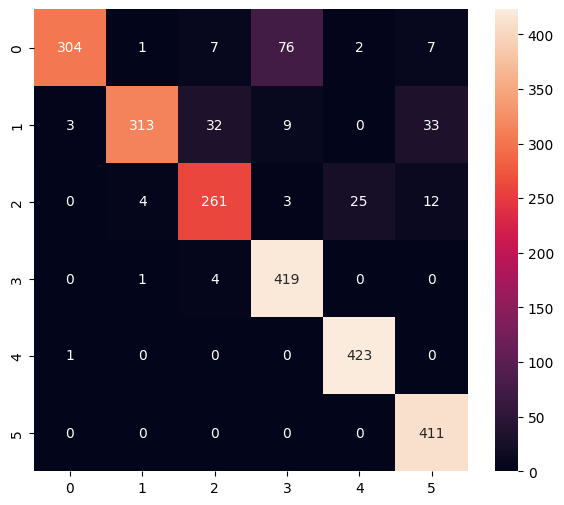

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       397
           1       0.98      0.80      0.88       390
           2       0.86      0.86      0.86       305
           3       0.83      0.99      0.90       424
           4       0.94      1.00      0.97       424
           5       0.89      1.00      0.94       411

    accuracy                           0.91      2351
   macro avg       0.91      0.90      0.90      2351
weighted avg       0.91      0.91      0.90      2351



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [24]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\YEFRIE~1\AppData\Local\Temp\tmp134clca1\assets


INFO:tensorflow:Assets written to: C:\Users\YEFRIE~1\AppData\Local\Temp\tmp134clca1\assets


Saved artifact at 'C:\Users\YEFRIE~1\AppData\Local\Temp\tmp134clca1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1708057029344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708084542656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708106995088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708106995792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708107000720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708107001424: TensorSpec(shape=(), dtype=tf.resource, name=None)


6644

# Inference test

In [25]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\Yefri Estiven Vera\Documents\GitHub\TESIS_GR\gestos\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [26]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [27]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [28]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 15.6 ms
Wall time: 7.36 ms


In [29]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9702764e-02 2.1892194e-02 7.5973213e-02 2.5045194e-02 8.4732783e-01
 5.8853871e-05]
4
